# Classification 
----------------------------------------------------
__Key Takeaways__:

---------------------
__1. By the end of this lab, you will have gained a comprehensive understanding of:__
   - classification techniques and 
   - their applications in predicting customer churn. 
   -------------
__2. You will also be equipped with practical skills to:__
   - preprocess data, 
   - build classification models, 
   - evaluate model performance, and 
   - deploy models in real-world scenarios.

## Hands-on Project: Customer Churn Prediction

### Steps:

#### 1. Dataset Introduction:

Understanding the dataset for customer churn prediction.

#### 2. Data Preparation:

Cleaning data, Handling Missing Values, Encoding Categorical Variables.

#### 3. Data Exploration:

Visualizing data distribution, Understanding feature relationships.

__Feature Engineering:__ Creating new features, Feature Scaling.

#### 4. Model Building:

- Logistic Regression
- Decision Trees
- Random Forest

#### 5. Model Evaluation:

Comparing model performance using various evaluation metrics.

__Hyperparameter Tuning:__ Optimizing model parameters for better performance.

#### 6. Interpretation of Results:

Analyzing model predictions and drawing actionable insights.

__Deployment Considerations:__ Integrating the model into production systems using __Dash__. A simple web application will be a good starting point.

## 1. Prepare Data

### Import

In [1]:
import pandas as pd

df = pd.read_csv('./data/churn.csv')
df.head(2).transpose()

,0,1
RowNumber,1,2
CustomerId,15634602,15647311
Surname,Hargrave,Hill
CreditScore,619,608
Geography,France,Spain
Gender,Female,Female
Age,42,41
Tenure,2,1
Balance,0.0,83807.86
NumOfProducts,1,1


### Preprocess Data

In [2]:
# install 'pytimetk' to use 'glimpse'
import pytimetk as tk

In [3]:
# Considering the data comes from customers, we might not need to display confidential information 
# by specifying the width in glimpse method from pytimetk package to 0.
# df.glimpse(max_width=0)

__Irrelevant Columns__

In [4]:
# We need to remove irrelevant columns
# 'RowNumber', 'CustomerId' and 'Surname' are not relevant to this particular project.
irrelevant_features = ['RowNumber', 'Surname', 'CustomerId']

# Remove irrelevant features
df.drop(
    columns=irrelevant_features,
    inplace=True
)

# now we can view the data without worrying about sensitive information
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


__Data Profiling__

Use `skimpy` package for data profiling.

In [49]:
pip install skimpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import skimpy as sk

In [7]:
import skimpy as sk
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0   ┃ p25    ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ CreditScore        │   0 │     0 │     650 │     97 │  350 │    580 │     650 │     720 │     850 │  ▂▅▇▆▃ │  │
│ │ Age                │   0 │     0 │      39 │     10 │   18 │     32 │      37 │      44 │      92 │  ▃▇▃▁  │  │
│ │ Tenure             │   0 │     0 │       5 │    2.9 │    0 │      3 │       5 │       7 │      10 │ ▆▇▃▇▇▆ │  │
│ │ Balance            │   0 │     0 │   76000 │  62000 │    0 │      0 │   97000 │  130000 │  250000 │ ▇▂▆▅▁  │  │
│ │ NumOfProducts      │   0 │     0 │     1.5 │   0.58 │    1 │      1 │       1 │       2 │       4 │  ▇ ▇   │  │
│ │ HasCrCard          │   0 │     0 │    0.71 │   0.46 │    0 │      0 │       1 │       1 │       1 │ ▃    ▇ │  │
│ │ IsActiveMember     │   0 │     0 │    0.52 │    0.5 │    0 │      0 │       1 │       1 │       1 │ ▇    ▇ │  │
│ │ EstimatedSalary    │   0 │     0 │  100000 │  58000 │   12 │  51000 │  100000 │  150000 │  200000 │ ▇▇▇▇▇▇ │  │
│ │ Exited             │   0 │     0 │     0.2 │    0.4 │    0 │      0 │       0 │       0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴────────┴──────┴────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Geography                 │       0 │          0 │                            1 │                    10000 │  │
│ │ Gender                    │       0 │          0 │                            1 │                    10000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

__Handle Missing Values__

In [8]:
# The data do not have missing values
df.isnull().sum()/len(df)

CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

__Encoding Categorical Variables__

In [9]:
# Very useful library to use for one-hot encoding categorical features
from category_encoders import OneHotEncoder

In [10]:
# instantiate the encoder and specify columns to encode
ohe = OneHotEncoder(
    use_cat_names=True, 
    cols=['Geography', 'Gender']
)

# Transform data
encoded_df = ohe.fit_transform(df)

# Data is analysis-ready
encoded_df.head()

,CreditScore,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,0,0,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,1,0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,0,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,0,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,1,0,1,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography_France   10000 non-null  int64  
 2   Geography_Spain    10000 non-null  int64  
 3   Geography_Germany  10000 non-null  int64  
 4   Gender_Female      10000 non-null  int64  
 5   Gender_Male        10000 non-null  int64  
 6   Age                10000 non-null  int64  
 7   Tenure             10000 non-null  int64  
 8   Balance            10000 non-null  float64
 9   NumOfProducts      10000 non-null  int64  
 10  HasCrCard          10000 non-null  int64  
 11  IsActiveMember     10000 non-null  int64  
 12  EstimatedSalary    10000 non-null  float64
 13  Exited             10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


### Explore

In [12]:
# For Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn

#### Univariate Analysis

In [13]:
(
    df['Exited']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

Exited
No     7962
Yes    2038
Name: count, dtype: int64

In [14]:
# Prepare data to display
labels = (
    df['Exited']
    .astype('str')
    .str.replace('0','No', regex=True)
    .str.replace('1','Yes', regex=True)
    .value_counts()
)

# Create figure using Plotly
fig = px.bar(
    data_frame=labels, 
    x=labels.index, 
    y=labels.values, 
    title=f'Class Imbalance', 
    color=labels.index
)

# Add titles & Display figure
# fig.update_layout(xaxis_title='Label', yaxis_title='Number of Customers')
fig.show()

The classes are imbalanced. We may decide to use Imbalanced techniques (e.g. OverSampling or UnderSampling from Sklearn) in order to improve model performance.

## Multi-variate Analysis

### Numeric Features

In [15]:
df.select_dtypes('number').nunique()

CreditScore         460
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [16]:
# Select features to plot
plot_cols = ['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']

# Plot numeric features against target
plt.Figure(figsize=(3,4))
for col in plot_cols:
    fig = px.box(data_frame=df[plot_cols], x=col, color=df['Exited'], title=f'BoxPlot for {col} Feature against the Target')
    fig.update_layout(xaxis_title=f'{col} Feature')
    fig.show()

### Categorical Features

In [17]:
# Aggregate Geography Feature
geo_df = pd.DataFrame(
    df[['Geography', 'Exited']]
    .groupby(['Exited'])
    .value_counts()
    .reset_index()
    )
geo_df

,Exited,Geography,count
0,0,France,4203
1,0,Spain,2064
2,0,Germany,1695
3,1,Germany,814
4,1,France,811
5,1,Spain,413


In [18]:
# Plot Geo feature vs label
fig = px.bar(
    data_frame=geo_df, 
    x='Geography', 
    y='count', 
    facet_col='Exited', 
    color=geo_df['Exited'].astype(str) # convert it to string to avoid continuous scale on legend
)

fig.update_layout(xaxis_title='Geography', yaxis_title='Number of Customers')
fig.show()
# geo_values

In [19]:
# Aggregate Gender Feature
gen_df = pd.DataFrame(
    df[['Gender', 'Exited']]
    .groupby(['Exited'])
    .value_counts()
    .reset_index()
    )
gen_df

,Exited,Gender,count
0,0,Male,4558
1,0,Female,3404
2,1,Female,1139
3,1,Male,899


In [20]:
# Plot Gender against label
fig = px.bar(
    data_frame=gen_df, 
    x='Gender', 
    y='count', 
    facet_col='Exited', 
    color=gen_df['Exited'].astype(str), 
    title='Gender vs Target'
)

fig.update_layout(xaxis_title='Gender', yaxis_title='Number of Customers')
fig.show()

In [21]:
HasCrCard_df = pd.DataFrame(
    df[['HasCrCard', 'Exited']]
    .groupby(['Exited'])
    .value_counts()
    .reset_index()
)
# Plot HasCrCard against label
fig = px.bar(
    data_frame=HasCrCard_df, 
    x='HasCrCard', 
    y='count', 
    facet_col='Exited', 
    color=HasCrCard_df['Exited'].astype(str), 
    title='HasCrCard_df vs Target'
)

fig.update_layout(xaxis_title='HasCrCard', yaxis_title='Number of Customers')
fig.show()

__Task:__ Do the same on `IsActiveMember`.

### Split Data

In [22]:
label = 'Exited'
X = df.drop(columns=[label], inplace=False)
y = df[label]
X.shape

(10000, 10)

In [23]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of splitted data
print(
    f'Training dataset \
    \nX_train: {X_train.shape[0]/len(X)*100:.0f}% \ny_train: {y_train.shape[0]/len(X)*100:.0f}% \
    \n\nValidation dataset \
    \nX_val: {X_val.shape[0]/len(X)*100:.0f}% \ny_val: {y_val.shape[0]/len(X)*100:.0f}%'
)

Training dataset     
X_train: 80% 
y_train: 80%     

Validation dataset     
X_val: 20% 
y_val: 20%


## 2. Build Model

### Baseline
- Determine the benchmark of your model using the baseline of the metric to be measured, in this case, __accuracy__ will be the one to consider.

In [24]:
# Calculate baseline model accuracy
acc_baseline = y_train.value_counts(normalize=True).max()

# Print the benchmark
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.79


### Iterate
- At this point, train your models using different machine learning algorithms.

**Task:** Create a pipeline named `model` that contains a `OneHotEncoder` transformer and a `LogisticRegression` predictor. Be sure you set the `use_cat_names` argument for your transformer to `True`. Then fit it to the training data. 


In [25]:
# Model pipeline
from sklearn.pipeline import make_pipeline

# Data Scaling
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

# Three models selected
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score

__Logistic Regression__

In [26]:
# Build model
model_lr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=2500)
)
# Fit model to training data
model_lr.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Geography', 'Gender'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=2500))])

**Task:** Calculate training and validation accuracy score for `model_lr`. 

In [27]:
lr_train_acc = model_lr.score(X_train, y_train)
lr_val_acc = model_lr.score(X_val, y_val)

print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
print("Logistic Regression, Validation Accuracy Score:", lr_val_acc)

Logistic Regression, Training Accuracy Score: 0.812
Logistic Regression, Validation Accuracy Score: 0.8125


**Task:** Instead of using the `predict` method with your model, try `predict_proba` with your training data. 
- How does the `predict_proba` output differ than that of `predict`? 
- What does it represent?

In [28]:
# Predict label
model_lr.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
# Predict probability of customer churn
y_train_pred_proba = model_lr.predict_proba(X_val)
print(y_train_pred_proba[:5])

[[0.75807102 0.24192898]
 [0.92152388 0.07847612]
 [0.6945177  0.3054823 ]
 [0.56289599 0.43710401]
 [0.93506887 0.06493113]]


**Task:** Extract the feature names and importances from your `model_lr`.

In [30]:
features = model_lr.named_steps["onehotencoder"].get_feature_names_out()
coefs = model_lr.named_steps["logisticregression"].coef_[0]

**Task:** Create a pandas Series named `odds_ratios`, where the index is `features` and the values are your the exponential of the `importances`. 

In [31]:
# for exponent method
import numpy as np

odds_ratios = pd.Series(np.exp(coefs), index=features).sort_values()
odds_ratios.head()

Gender_Male         0.335773
IsActiveMember      0.339984
Geography_France    0.430886
Geography_Spain     0.459607
Gender_Female       0.536195
dtype: float64

In [32]:
# Create horizontal bar chart of feature importances
plt.Figure(figsize=(15,10))
fig = px.bar(
    data_frame=odds_ratios, 
    x=odds_ratios[:10].values, 
    y=odds_ratios[:10].index, 
    title="Customer Churn Logistic Regression, Feature Importance (Odds Ratio)"
)

fig.update_layout(xaxis_title='Odds Ratio', yaxis_title='')
fig.show()

__Decision Tree Classifier__

**Task:** Perhaps a decision tree model will perform better than logistic regression, but what's the best hyperparameter value for `max_depth`? 
- Create a `for` loop to train and evaluate the model `model_dt` at all depths from 1 to 15. Be sure to use an appropriate encoder for your model, and to record its training and validation accuracy scores at every depth. 

In [33]:
# Depth parameters
depth_hyperparams = range(1, 16)

# List of scores per each set for visualization purpose
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Build model
    model_dt = make_pipeline(
        OneHotEncoder(use_cat_names=True),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # Fit model
    model_dt.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(model_dt.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(model_dt.score(X_val, y_val))

**Task:** Using the values in `training_acc` and `validation_acc`, plot the validation curve for `model_dt`. Label your x-axis `"Max Depth"` and your y-axis `"Accuracy Score"`. Use the title `"Validation Curve, Decision Tree Model"`, and include a legend. 

In [34]:
tune_data = pd.DataFrame(
    data = {'Training': training_acc, 'Validation': validation_acc}, 
    index=depth_hyperparams
)
tune_data   

,Training,Validation
1,0.794375,0.8035
2,0.840000,0.8440
3,0.845375,0.8485
4,0.853250,0.8535
5,0.858750,0.8575
6,0.865875,0.8605
7,0.875375,0.8590
8,0.882125,0.8550
9,0.891125,0.8555
10,0.901750,0.8405


In [35]:
# Optimization technique to find best parameters - 'max_depth'
tune_data = pd.DataFrame(
    data = {'Training': training_acc, 'Validation': validation_acc}, 
    index=depth_hyperparams
)

# Display the figure
fig = px.line(
    data_frame=tune_data, 
    x=depth_hyperparams, 
    y=['Training', 'Validation'], 
    title="Training & Validation Curves (Decision Tree Model)"
)

# Add axes titles
fig.update_layout(xaxis_title ="Maximum Depth", yaxis_title="Acccuracy Score")
fig.show()

Maximum depth of 6 gives the highest score from the validation set. We will consider that in our final model.

## 3. Evaluate Model

- Consider the best model from the iteration phase.

In [36]:
# Final model build
final_model_dt = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=6, random_state=42)
)

# Fit Final Model
final_model_dt.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Geography', 'Gender'],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [37]:
# Predict Validation set
y_val_pred = final_model_dt.predict(X_val)
y_val_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [38]:
# Final model accuracy
print(f'Final model accuracy: {accuracy_score(y_val, final_model_dt.predict(X_val))}')

Final model accuracy: 0.8605


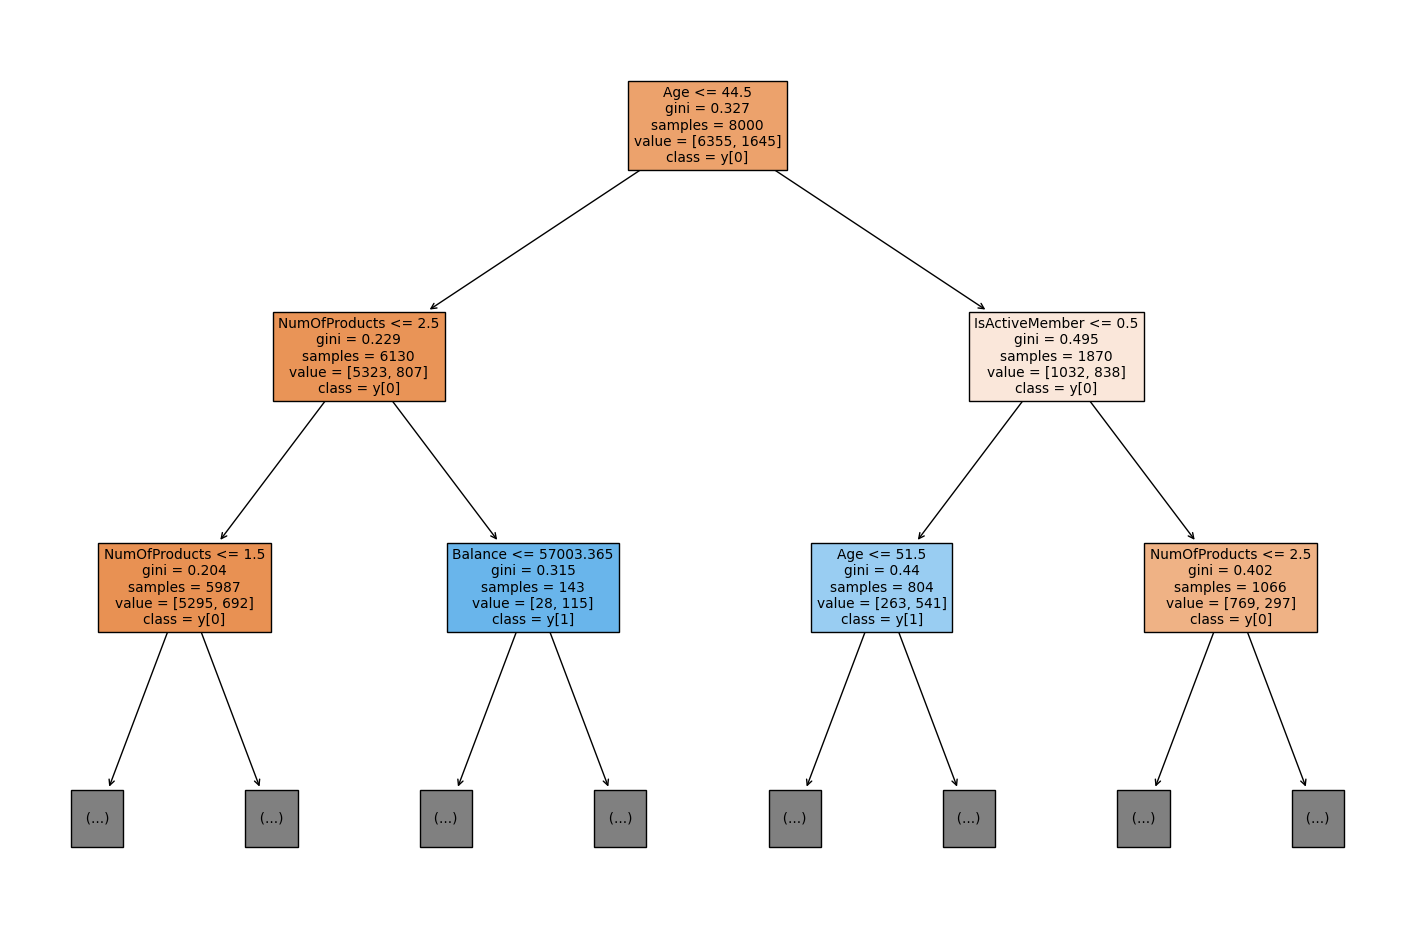

In [39]:
feature_names = final_model_dt.named_steps.decisiontreeclassifier.feature_names_in_

plt.figure(figsize=(18,12))
plot_tree(
    decision_tree=final_model_dt.named_steps['decisiontreeclassifier'], 
    filled=True, 
    max_depth=2, 
    feature_names=feature_names, # to display feature names on each node instead of x[0], x[1], etc
    class_names=True
)
plt.axis('off')
plt.show()

## 4. Communicate Results

- Create a simple __Dash__ Web Application that helps to predict the probability of customer churn. 
- The application should take features as inputs and provide an output of the probability of customer churn. 
- Feature Importance visualization must be included.

__Save the Model__

In [40]:
# To handle artifacts
import joblib

In [41]:
# Save Models
joblib.dump(model_lr, 'artifacts/model_lr.pkl')
joblib.dump(model_dt, 'artifacts/model_dt.pkl')
joblib.dump(final_model_dt, 'artifacts/final_model_dt.pkl')

# Load the Final Model
model = joblib.load('artifacts/final_model_dt.pkl')

In [42]:
# Extract features and their coefficients
coefficients = model.named_steps["decisiontreeclassifier"].feature_importances_
features = model.named_steps['decisiontreeclassifier'].feature_names_in_

# Convert to Pandas Series
feat_imp = pd.Series(
    np.exp(coefficients), index=features
).sort_values(ascending=True)

In [43]:
# Create horizontal bar chart of feature importances
fig = px.bar(
    data_frame=feat_imp, 
    x=feat_imp[:15].values, 
    y=feat_imp[:15].index, 
    title="Customer Churn Decision Tree, Feature Importance (Gini) - 15 features"
)

fig.update_layout(xaxis_title='Gini Importance', yaxis_title='')
fig.show()

__App Layout__

In [44]:
# You can use ChatGPT to create a simple web application

## Training other ML classifiers

__Naive Bayes__

In [45]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [46]:
# Instantiate the Bernoulli Naive Bayes model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    BernoulliNB()
)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Geography', 'Gender'],
                               use_cat_names=True)),
                ('bernoullinb', BernoulliNB())])

In [47]:
# Make predictions on the testing data
nb_y_pred = model.predict(X_val)

In [48]:
# Evaluate the model
print(f"Classification Metrics:")
metrics_dict = {
    'Accuracy': accuracy_score(y_val, nb_y_pred).round(4), 
    'Precision': precision_score(y_val, nb_y_pred).round(4), 
    'Recall': recall_score(y_val, nb_y_pred).round(4), 
    'F1-score': f1_score(y_val, nb_y_pred).round(4)
}

metrics_df = pd.DataFrame(
    data=metrics_dict, 
    index=['Metrics:']
)
metrics_df

Classification Metrics:


AttributeError: 'float' object has no attribute 'round'

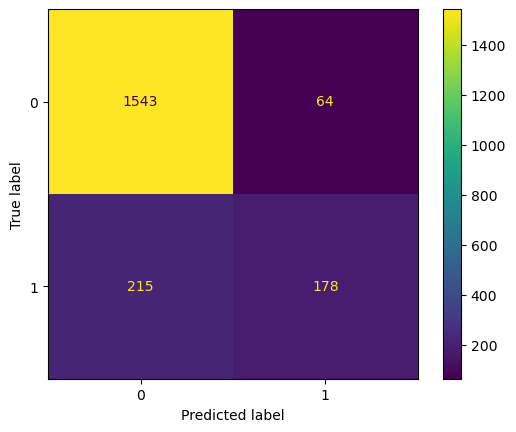

In [ ]:
nb_conf_matrix = confusion_matrix(y_val, y_val_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=nb_conf_matrix,
    display_labels=model.classes_
)
disp.plot();

### Bagging and Boosting Techniques

__1. Random Forest:__ Bagging method.

__2. AdaBoost:__ Boosting method.

In [ ]:
# Try ensemble methods
from sklearn.ensemble import *

In [ ]:
models = [RandomForestClassifier(n_estimators=100, random_state=42), AdaBoostClassifier()]

accuracy_scores = []
precisions = []
f1_scores = []
recalls = []
conf_matrix = []
for clf_algorithm in models:
    model = make_pipeline(
        OneHotEncoder(use_cat_names=True), 
        clf_algorithm
    )
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Evaluate each model and append the metrics to a list
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    
    conf_matrix.append(confusion_matrix(y_val, model.predict(X_val)))

c:\Users\Eddie\anaconda3\envs\mlg-382-class\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



__Evaluation Metrics__

In [ ]:
# Ensemble methods metrics dictionary
ens_metrics = {
        'Accuracy': accuracy_scores,
        'Precision': precisions,
        'F1-Score': f1_scores, 
        'Recall': recalls
    }

# Convert into a DataFrame
pd.DataFrame(
    data=ens_metrics, 
    index=['Random Forest (Bagging)', 'AdaBoost (Boosting)']
).sort_values(
    by='Accuracy', 
    ascending=False
)

,Accuracy,Precision,F1-Score,Recall
Random Forest (Bagging),0.865,0.748988,0.578125,0.470738
AdaBoost (Boosting),0.856,0.686833,0.572700,0.491094


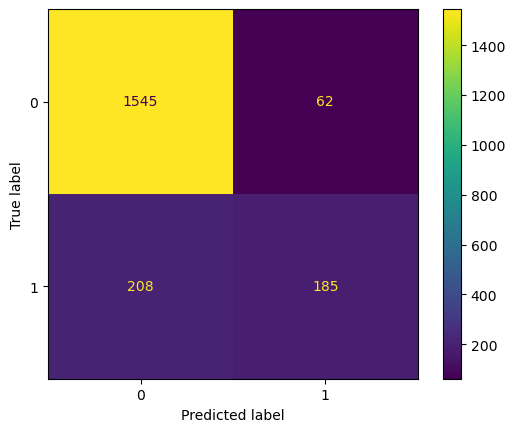

In [ ]:
conf_matrix[0]
con_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix[0])
con_disp.plot();

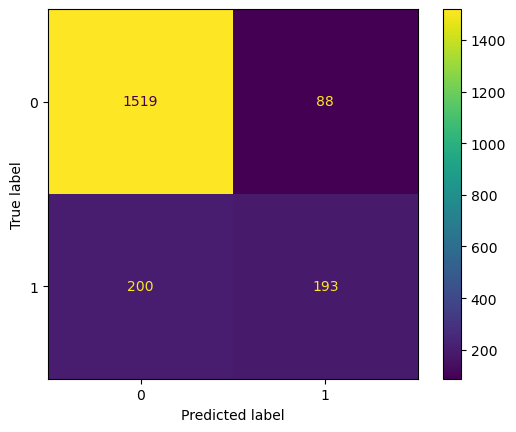

In [ ]:
# Display Confusion Matrix
conf_matrix[0]
con_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix[1])
con_disp.plot();

__Remarks:__

`Random Forest` is the best model in this case with highest scores (`Accuracy`, `Precision` and `F1-Score`) except `Recall`. This indicates its power in handling classification problems using `Bagging` approach.

You can consider hyperparameter tuning of these ensemble methods to find the best parameters that maximize model performance.

## Further Reading (Optional):

__1. Handling Imbalanced Datasets:__

Techniques like Oversampling, Undersampling, SMOTE

__2. Model Interpretability:__

Techniques for understanding and explaining model predictions (e.g., SHAP values)

__3. Ensemble Techniques:__

Introduction to advanced ensemble methods like Gradient Boosting Machines (GBM), XGBoost, LightGBM


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = {
    'price_aprox_usd': [129000.0, 87000.0, 118000.0, 57000.0, 90000.0],
    'surface_covered_in_m2': [70.0, 42.0, 54.0, 42.0, 50.0],
    'lat': [-34.584651, -34.638979, -34.615847, -34.625222, -34.610610],
    'lon': [-58.454693, -58.500115, -58.459957, -58.382382, -58.412511],
    'neighborhood': ['Chacarita', 'Villa Luro', 'Caballito', 'Constitución', 'Once']
}
df = pd.DataFrame(data)

# Train the model
X = df[['surface_covered_in_m2', 'lat', 'lon']]
y = df['price_aprox_usd']
model = RandomForestRegressor()
model.fit(X, y)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1("House Price Prediction"),
    html.Label("Surface Covered (m2):"),
    dcc.Input(id='surface', type='number', value=50),
    html.Label("Latitude:"),
    dcc.Input(id='latitude', type='number', value=-34.6),
    html.Label("Longitude:"),
    dcc.Input(id='longitude', type='number', value=-58.4),
    html.Label("Neighborhood:"),
    dcc.Input(id='neighborhood', type='text', value=''),
    html.Button('Predict', id='submit-val', n_clicks=0),
    html.Div(id='output-prediction')
])

# Define callback to update prediction
@app.callback(
    Output('output-prediction', 'children'),
    [Input('submit-val', 'n_clicks')],
    [dash.dependencies.State('surface', 'value'),
     dash.dependencies.State('latitude', 'value'),
     dash.dependencies.State('longitude', 'value'),
     dash.dependencies.State('neighborhood', 'value')])
def update_output(n_clicks, surface, latitude, longitude, neighborhood):
    prediction = model.predict([[surface, latitude, longitude]])
    return f"The predicted house price is ${prediction[0]:,.2f}"

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


c:\Users\Eddie\anaconda3\envs\mlg-382-class\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\Eddie\anaconda3\envs\mlg-382-class\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

c:\Users\Eddie\anaconda3\envs\mlg-382-class\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

